# 24FS\_I4DS27: Adversarial Attacks - Wie kann KI überlistet werden? <br> 07-customtransform-testing

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

import torch
import torchvision
import matplotlib.pyplot as plt

from src.data.covidx import COVIDXDataModule
from src.utils.transform_perturbation import AddImagePerturbation

In [2]:
# Create Testing Image and Perturbation Tensors
image_tensor = torch.randn(1, 3, 500, 256)  
perturbation_tensor = torch.randn(5, 3, 224, 224) 


In [3]:
# Create two transforms, one for the image and one for the adversarial perturbation image
transform_adv = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((224, 224), antialias=True),
        AddImagePerturbation(perturbation=perturbation_tensor, p=1, idx=None)
    ],
)

transform_img = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((224, 224), antialias=True),
    ],
)

In [4]:
# Apply the transforms to the image tensor
transformed_adv = transform_adv(image_tensor)
transformed_img = transform_img(image_tensor)

print("Image Tensor:")
print(image_tensor.shape)

print("Perturbation Tensor:")
print(perturbation_tensor.shape)

print("Transformed Image Tensor:")
print(transformed_adv.shape)

Image Tensor:
torch.Size([1, 3, 500, 256])
Perturbation Tensor:
torch.Size([5, 3, 224, 224])
Transformed Image Tensor:
torch.Size([3, 224, 224])


## Conclusion

Custom Class *AddImagePerturbation* works correctly and can be used to add perturbations to images. 

use following code to add perturbations to images:



In [5]:
transform_adv = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((224, 224), antialias=True),
        AddImagePerturbation(perturbation=perturbation_tensor, p=1, idx=None)
    ],
)

# Testing Reproducability DataLoader

Image Tensors with no perturbation:
torch.Size([224, 224, 3])


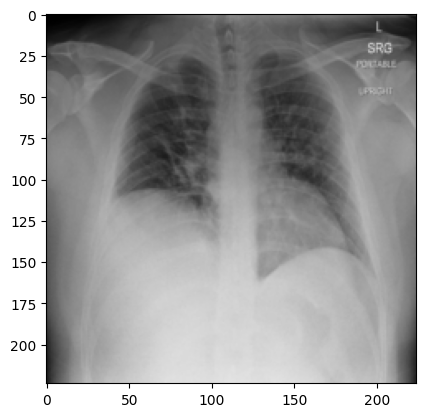

torch.Size([224, 224, 3])


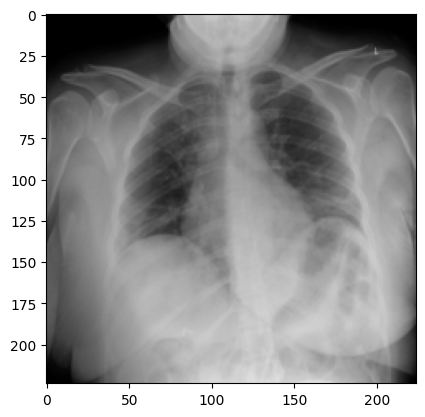

torch.Size([224, 224, 3])


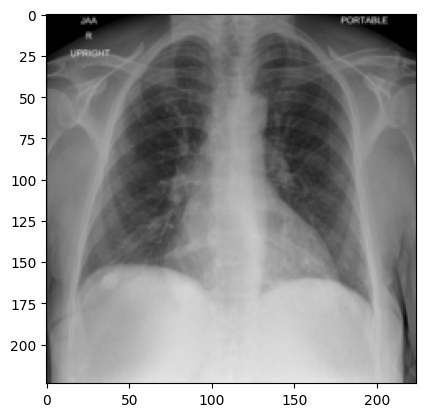

torch.Size([224, 224, 3])


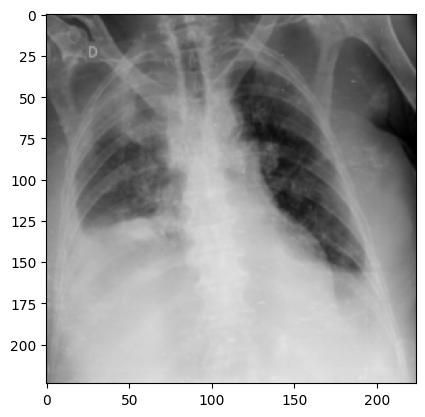

torch.Size([224, 224, 3])


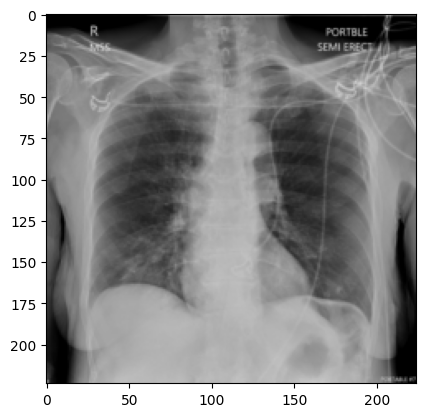

Image Tensors with perturbation:
torch.Size([224, 224, 3])


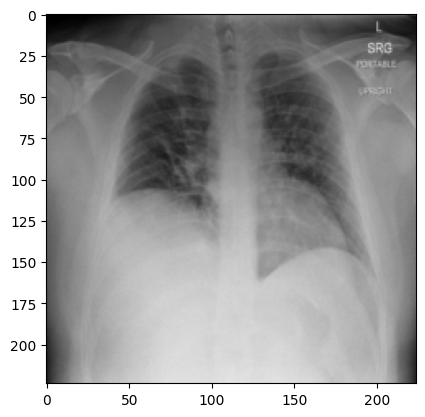

torch.Size([224, 224, 3])


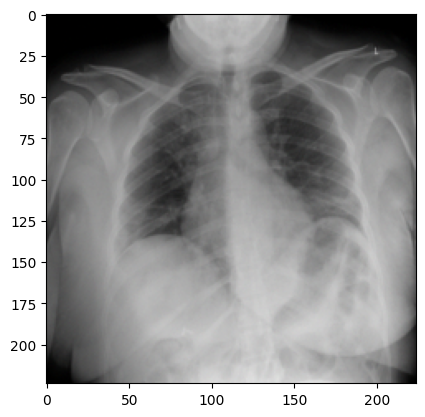

torch.Size([224, 224, 3])


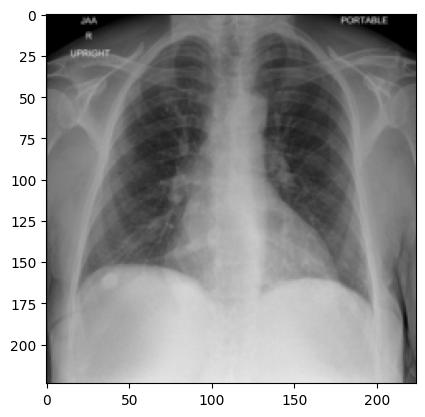

torch.Size([224, 224, 3])


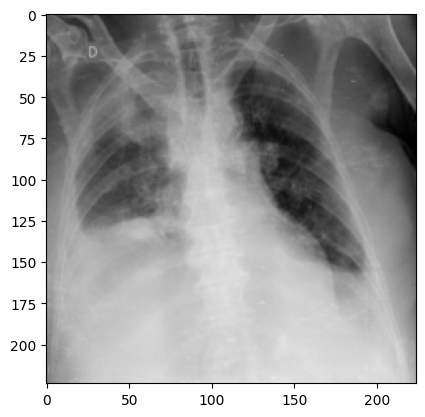

torch.Size([224, 224, 3])


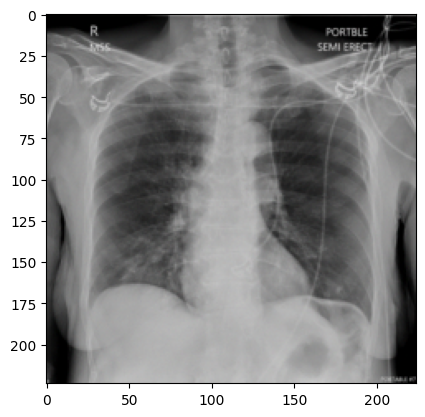

In [6]:
print("Image Tensors with no perturbation:")

dataloader = COVIDXDataModule(
    path="data/raw/COVIDX-CXR4",
    transform=transform_img,
    num_workers=0,
    batch_size=32,
    seed=42,
).setup()

i=0
for batch in dataloader.test_dataloader():
    if i >= 5:
        break

    img = batch[0][0].int().clip(0, 255).permute(1, 2, 0)
    print(img.shape)
    plt.imshow(img)
    plt.show()
    i+=1

print("Image Tensors with perturbation:")

dataloader_adv = COVIDXDataModule(
    path="data/raw/COVIDX-CXR4",
    transform=transform_adv,
    num_workers=0,
    batch_size=32,
    seed=42,
).setup()

i=0
for batch in dataloader_adv.test_dataloader():
    if i >= 5:
        break

    img = batch[0][0].int().clip(0, 255).permute(1, 2, 0)
    print(img.shape)
    plt.imshow(img)
    plt.show()
    i+=1